In [ ]:
!pip install numpy-financial

#Funciones y datos

In [ ]:
import numpy_financial as npf
import math
import pandas as pd  # Para mostrar la tabla
import matplotlib.pyplot as plt  # Para las gráficas


precio_p_min = 600
precio_p_max = 1200
step_p = 100

precio_b = 0  # precio_b es constante
tasa_descuento = 0.05 #5% de C.O
tasa_descuento2 = 0.08 # 8% de C.O

#tir = npf.irr(flujos)  # Calcular la TIR

def calcular_vpn(flujo_inicial, flujos, tasa_descuento):
    vpn_flujos_futuros = 0

    # Calcular el VPN de los flujos futuros
    for t in range(1, len(flujos)):
        valor_presente = flujos[t] / (1 + tasa_descuento) ** t
        vpn_flujos_futuros += valor_presente

    # Sumamos el flujo inicial
    vpn_total = flujo_inicial + vpn_flujos_futuros

    return vpn_total

def calcular_nper(PV, PMT, rate, FV=0):
    if rate == 0:
        return PV / PMT  # Caso especial sin tasa de interés

    try:
        denominador = PMT + rate * PV
        if denominador <= 0:
            return None  # Evita divisiones inválidas
        NPER = math.log((PMT - rate * FV) / denominador) / math.log(1 + rate)

        return NPER
    except (ValueError, ZeroDivisionError):
        return None  # Manejo de errores matemáticos

#Ind1


Resultados guardados en 'resultados_vpn_tir_payback.xlsx'

Resultados para la industria 1:
 Precio_P  Precio_B  TIR (%)  VPN (5%)  Payback (5%)  VPN (8%)  Payback (8%)
      600         0 21.67096 274180.09        5.3306 175641.45        5.9298
      700         0 18.44197 252180.09        6.3713 153641.45        7.2468
      800         0 15.97163 230180.09        7.4676 131641.45        8.7125
      900         0 14.00596 208180.09        8.6259 109641.45       10.3648
     1000         0 12.39395 186180.09        9.8536  87641.45       12.2582
     1100         0 11.04018 164180.09       11.1596  65641.45       14.4753
     1200         0  9.88137 142180.09       12.5544  43641.45       17.1502


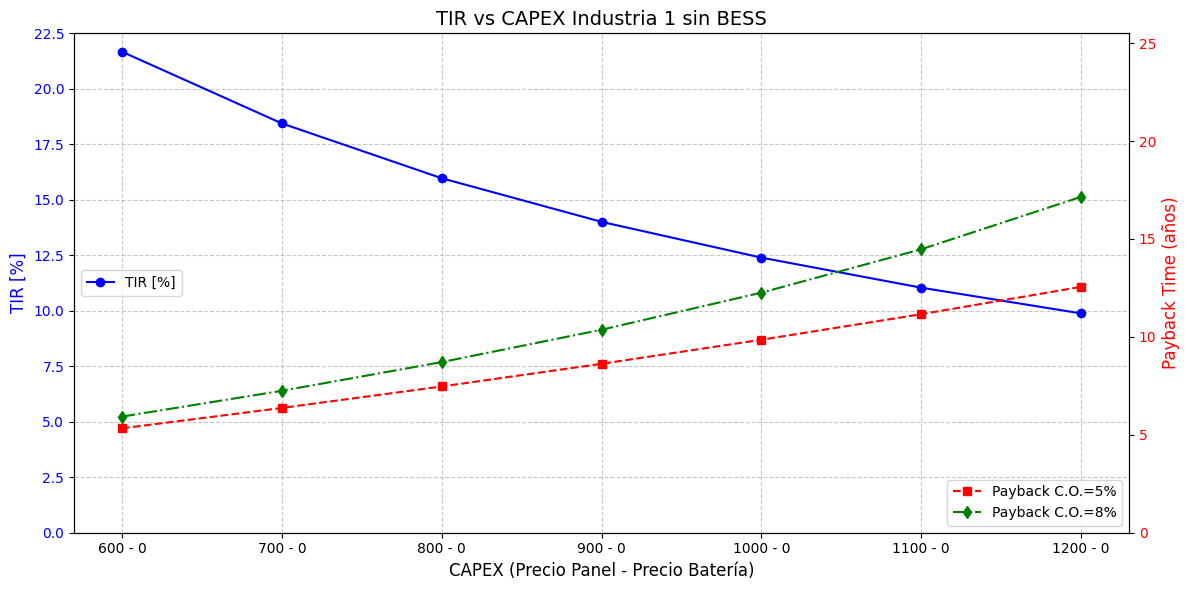

In [ ]:
# Parámetros iniciales y configuración de variaciones

segunda_variable = 28819.4751955


# Lista para almacenar resultados
resultados = []

# Iterar sobre el rango de precios de precio_p
for precio_p in range(precio_p_min, precio_p_max + 1, step_p):
    primer_variable = primer_variable = -(220 * precio_p) # Establecer primer_variable como 0

    # Crear lista de flujos con el primer valor y los 25 valores de segunda_variable
    flujos = [primer_variable] + [segunda_variable] * 25

    # Calcular la TIR
    tir = npf.irr(flujos)
    tir_porcentaje = round(tir * 100, 5)

    # Calcular VPN para 12% y 8%
    flujo_inicial = flujos[0]
    vpn_total = calcular_vpn(flujo_inicial, flujos, tasa_descuento)
    vpn_total2 = calcular_vpn(flujo_inicial, flujos, tasa_descuento2)

    # Calcular Payback Time
    payback = calcular_nper(flujo_inicial, segunda_variable, tasa_descuento)
    payback2 = calcular_nper(flujo_inicial, segunda_variable, tasa_descuento2)

    # Guardar resultados en la lista
    resultados.append({
        "Precio_P": precio_p,
        "Precio_B": precio_b,
        "TIR (%)": tir_porcentaje,
        "VPN (5%)": round(vpn_total, 2),
        "Payback (5%)": round(payback, 4),
        "VPN (8%)": round(vpn_total2, 2),
        "Payback (8%)": round(payback2, 4)
    })

# Mostrar los resultados en formato de tabla con Pandas
df_resultados = pd.DataFrame(resultados)

# Guardar los resultados en un archivo CSV
output_file = "resultados_Ind1_sinBESS.csv"
df_resultados.to_csv(output_file, index=False)

# Guardar los resultados en un archivo Excel
df_resultados.to_excel("resultados_Ind1_sinBESS.xlsx", index=False)
print("\nResultados guardados en 'resultados_vpn_tir_payback.xlsx'")

print("\nResultados para la industria 1:")
print(df_resultados.to_string(index=False))

# Crear una columna auxiliar con tuplas para ordenar correctamente
df_resultados["Orden"] = df_resultados.apply(lambda row: (row["Precio_P"], row["Precio_B"]), axis=1)

# Ordenar el DataFrame por esta nueva columna
df_resultados = df_resultados.sort_values(by="Orden")

# Eliminar la columna auxiliar después de ordenar
df_resultados = df_resultados.drop(columns=["Orden"])

# Crear o actualizar la columna para el eje X con formato "precio_p - precio_b"
df_resultados["CAPEX (Precio_P-B)"] = df_resultados["Precio_P"].astype(str) + " - " + df_resultados["Precio_B"].astype(str)

# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar TIR en el eje Y izquierdo
ax1.plot(
    df_resultados["CAPEX (Precio_P-B)"],
    df_resultados["TIR (%)"],
    marker='o', linestyle='-', color='b', label='TIR [%]'
)
ax1.set_xlabel("CAPEX (Precio Panel - Precio Batería)", fontsize=12)
ax1.set_ylabel("TIR [%]", color='b', fontsize=12)
ax1.set_ylim(0, 22.5)
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle='--', alpha=0.7)

# Crear un segundo eje Y para el Payback Time
ax2 = ax1.twinx()
ax2.plot(
    df_resultados["CAPEX (Precio_P-B)"],
    df_resultados["Payback (5%)"],
    marker='s', linestyle='--', color='r', label='Payback C.O.=5%'
)
ax2.plot(
    df_resultados["CAPEX (Precio_P-B)"],
    df_resultados["Payback (8%)"],
    marker='d', linestyle='-.', color='g', label='Payback C.O.=8%'
)
ax2.set_ylabel("Payback Time (años)", color='r', fontsize=12)
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, 25.5)

# Configurar el título y las etiquetas del eje X
plt.xticks(rotation=45, fontsize=10)
plt.title("TIR vs CAPEX Industria 1 sin BESS", fontsize=14)

# Agregar leyendas
ax1.legend(loc='center left')
ax2.legend(loc='lower right')

# Ajustar diseño para evitar superposición
plt.tight_layout()

# Mostrar la gráfica
plt.show()

#Ind2


Resultados guardados en 'resultados_vpn_tir_payback.xlsx'

Resultados para la industria 1:
 Precio_P  Precio_B  TIR (%)   VPN (5%)  Payback (5%)   VPN (8%)  Payback (8%)
      600         0 10.60880  197165.82       11.6443   72915.21       15.3638
      700         0  8.64376  144665.82       14.4396   20415.21       21.5133
      800         0  7.09194   92165.82       17.6773  -32084.79       33.5904
      900         0  5.82204   39665.82       21.5241  -84584.79           NaN
     1000         0  4.75467  -12834.18       26.2638 -137084.79           NaN
     1100         0  3.83872  -65334.18       32.4400 -189584.79           NaN
     1200         0  3.03961 -117834.18       41.3220 -242084.79           NaN


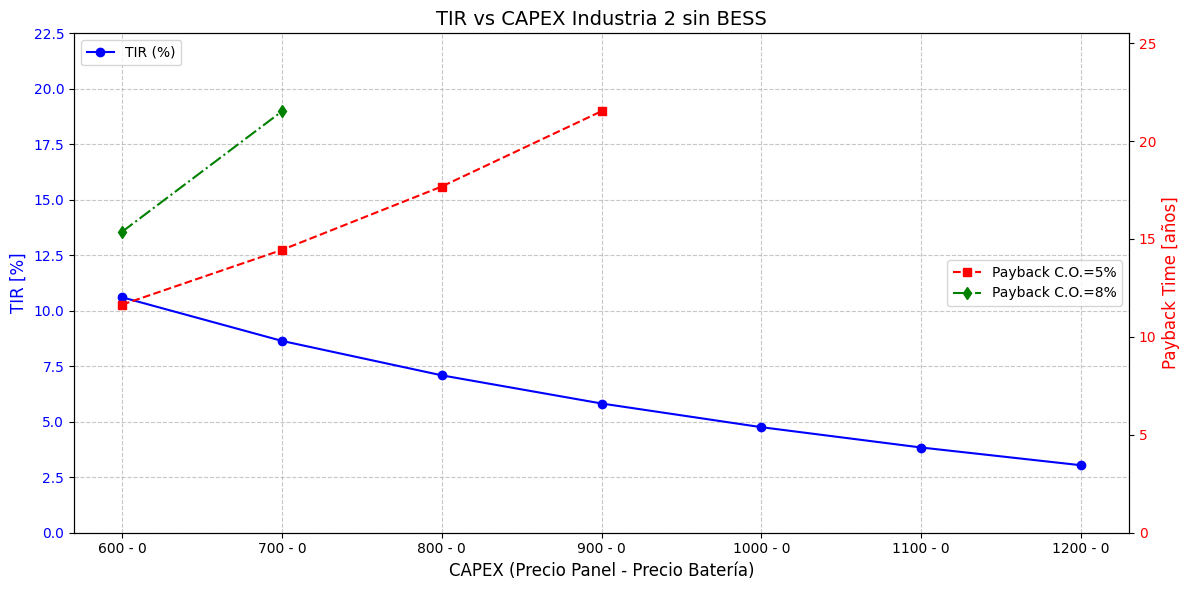

In [ ]:
import numpy_financial as npf
import math
import pandas as pd  # Para mostrar la tabla


segunda_variable_2 = 36339.4236325001

# Lista para almacenar resultados
resultados = []

# Iterar sobre el rango de precios de precio_p
for precio_p in range(precio_p_min, precio_p_max + 1, step_p):
    primer_variable = primer_variable = -(525 * precio_p) # Establecer primer_variable como 0

    # Crear lista de flujos con el primer valor y los 25 valores de segunda_variable
    flujos = [primer_variable] + [segunda_variable_2] * 25

    # Calcular la TIR
    tir = npf.irr(flujos)
    tir_porcentaje = round(tir * 100, 5)

    # Calcular VPN para 12% y 8%
    flujo_inicial = flujos[0]
    vpn_total = calcular_vpn(flujo_inicial, flujos, tasa_descuento)
    vpn_total2 = calcular_vpn(flujo_inicial, flujos, tasa_descuento2)

    # Calcular Payback Time
    payback_2 = calcular_nper(flujo_inicial, segunda_variable_2, tasa_descuento)
    payback2_2 = calcular_nper(flujo_inicial, segunda_variable_2, tasa_descuento2)

    # Guardar resultados en la lista
    resultados.append({
        "Precio_P": precio_p,
        "Precio_B": precio_b,
        "TIR (%)": tir_porcentaje,
        "VPN (5%)": round(vpn_total, 2),
        "Payback (5%)": round(payback_2, 4) if payback_2 is not None else None,
        "VPN (8%)": round(vpn_total2, 2),
        "Payback (8%)": round(payback2_2, 4) if payback2_2 is not None else None
    })

df_resultados = pd.DataFrame(resultados)
# Guardar los resultados en un archivo CSV
output_file = "resultados_Ind2_sinBESS.csv"
df_resultados.to_csv(output_file, index=False)

# Guardar los resultados en un archivo Excel
df_resultados.to_excel("resultados_Ind2_sinBESS.xlsx", index=False)
print("\nResultados guardados en 'resultados_vpn_tir_payback.xlsx'")

print("\nResultados para la industria 1:")
print(df_resultados.to_string(index=False))

# Crear una columna auxiliar con tuplas para ordenar correctamente
df_resultados["Orden"] = df_resultados.apply(lambda row: (row["Precio_P"], row["Precio_B"]), axis=1)

# Ordenar el DataFrame por esta nueva columna
df_resultados = df_resultados.sort_values(by="Orden")

# Eliminar la columna auxiliar después de ordenar
df_resultados = df_resultados.drop(columns=["Orden"])

# Crear o actualizar la columna para el eje X con formato "precio_p - precio_b"
df_resultados["CAPEX (Precio_P-B)"] = df_resultados["Precio_P"].astype(str) + " - " + df_resultados["Precio_B"].astype(str)

# Filtrar los datos para la gráfica: incluir solo "Payback (5%) <= 25" y "Payback (8%) <= 25"
df_resultados_grafica = df_resultados.copy()
df_resultados_grafica["Payback (5%)"] = df_resultados_grafica["Payback (5%)"].apply(
    lambda x: x if x is not None and x <= 25 else None
)
df_resultados_grafica["Payback (8%)"] = df_resultados_grafica["Payback (8%)"].apply(
    lambda x: x if x is not None and x <= 25 else None
)

# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar TIR en el eje Y izquierdo
ax1.plot(
    df_resultados["CAPEX (Precio_P-B)"],
    df_resultados["TIR (%)"],
    marker='o', linestyle='-', color='b', label='TIR (%)'
)
ax1.set_xlabel("CAPEX (Precio Panel - Precio Batería)", fontsize=12)
ax1.set_ylabel("TIR [%]", color='b', fontsize=12)
ax1.set_ylim(0, 22.5)
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle='--', alpha=0.7)

# Crear un segundo eje Y para el Payback Time
ax2 = ax1.twinx()
ax2.plot(
    df_resultados_grafica["CAPEX (Precio_P-B)"],
    df_resultados_grafica["Payback (5%)"],
    marker='s', linestyle='--', color='r', label='Payback C.O.=5%'
)
ax2.plot(
    df_resultados_grafica["CAPEX (Precio_P-B)"],
    df_resultados_grafica["Payback (8%)"],
    marker='d', linestyle='-.', color='g', label='Payback C.O.=8%'
)
ax2.set_ylabel("Payback Time [años]", color='r', fontsize=12)
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, 25.5)

# Configurar el título y las etiquetas del eje X
plt.xticks(rotation=45, fontsize=10)
plt.title("TIR vs CAPEX Industria 2 sin BESS", fontsize=14)

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='center right')

# Ajustar diseño para evitar superposición
plt.tight_layout()

# Mostrar la gráfica
plt.show()
